In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
data=pd.read_csv('textResponses.csv')

In [3]:
data['pattern']=''
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\ntds\lib\site-packages\ipykern

In [4]:
group_data=data.groupby(['Anon Student Id','Level (Assignment)','Problem Name'])[['Duration (sec)','pattern','Input','Problem Name']]

In [5]:
group_data.head()

,Duration (sec),pattern,Input,Problem Name
0,132.5,test,"no, because you don't change the denominater s...",5
1,581,test,I do not know this answer.,6
2,15.75,collaborative,Frist you need to double the denometor then do...,1a
3,0.333,collaborative,"First, multiply the denominater by two then do...",2a
4,11,collaborative,first muply 8 by 2 then do the same to the num...,3a
...,...,...,...,...
7324,8.8,collaborative,Use the same least common denominator,6a
7325,6.75,collaborative,DON'T ADD THE NUMERATOR,7a
7326,13.75,collaborative,the larger denominator does not always make it...,8a
7327,47.5,test,It cant be 6/13 becuase of the picture shown. ...,5


In [6]:
group_data.size()

Anon Student Id                       Level (Assignment)                  Problem Name
Stu_005a9729f8e3869ff12b105e0f7bb82e  Comparing Erroneous Collaboration   1a              1
                                                                          2a              1
                                                                          3a              1
                                                                          4a              1
                                      Equivalent Erroneous Collaboration  1a              1
                                                                                         ..
Stu_ffe4ba291fd0ec27d27a34dcceb3a617  LCD Erroneous Collaboration         8a              1
                                      Show what you know B                5               1
                                                                          6               1
                                      Show what you learned A             5          

In [7]:
data_rows=[temp_row for temp_row in group_data]

In [8]:
for a in data_rows[187][1].Input:
    print(a)

32/65 is smaller because it has smaller parts than 32/45. It has more parts as well.


In [9]:
analyze_list=[]

In [10]:
len(group_data)

7007

In [11]:
from nltk.metrics import edit_distance
ind_duration_mean=[]
ind_duration_sum=[]
ind_mod_num=[]
ind_mod_ed_mean=[]
ind_mod_ed_sum=[]

col_duration_mean=[]
col_duration_sum=[]
col_mod_num=[]
col_mod_ed_mean=[]
col_mod_ed_sum=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        col_duration_mean.append(temp_durance_mean)
        col_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        col_mod_num.append(temp_mod_num)
        col_mod_ed_mean.append(temp_mod_mean)
        col_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        ind_duration_mean.append(temp_durance_mean)
        ind_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        ind_mod_num.append(temp_mod_num)
        ind_mod_ed_mean.append(temp_mod_mean)
        ind_mod_ed_sum.append(temp_mod_sum)
    
    

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

# Mean Duration

In [13]:
stats.ttest_ind(ind_duration_mean,col_duration_mean,equal_var = False)

Ttest_indResult(statistic=-5.979947046247284, pvalue=2.393240261237353e-09)

In [14]:
stats.f_oneway(ind_duration_mean, col_duration_mean)

F_onewayResult(statistic=32.64458441692007, pvalue=1.164415287026949e-08)

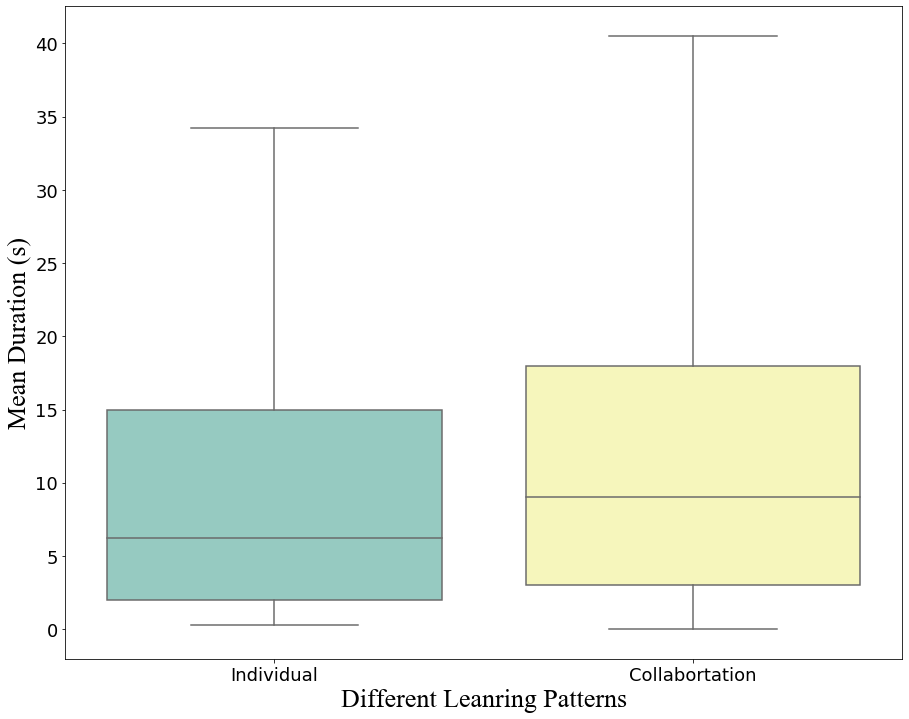

In [15]:
patterns=["Individual"]*len(ind_duration_mean)+ ['Collabortation']*len(col_duration_mean)
values=np.concatenate((ind_duration_mean,col_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Duration

In [16]:
stats.ttest_ind(ind_duration_sum,col_duration_sum,equal_var = False)

Ttest_indResult(statistic=-6.105550906788245, pvalue=1.1050167460071853e-09)

In [17]:
stats.f_oneway(ind_duration_sum, col_duration_sum)

F_onewayResult(statistic=34.070099149728044, pvalue=5.619334967850682e-09)

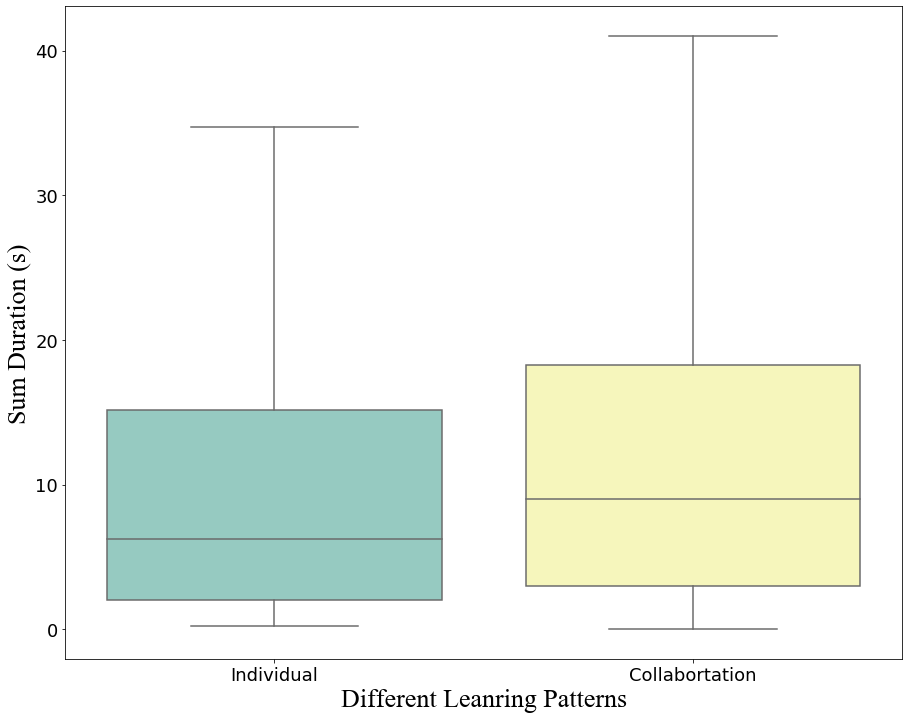

In [18]:
patterns=["Individual"]*len(ind_duration_sum)+ ['Collabortation']*len(col_duration_sum)
values=np.concatenate((ind_duration_sum,col_duration_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Duration (s)":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Number of Modifications

In [30]:
stats.ttest_ind(ind_mod_num,col_mod_num,equal_var = False)

Ttest_indResult(statistic=-5.721290872295107, pvalue=1.1150229573062504e-08)

In [31]:
stats.f_oneway(ind_mod_num, col_mod_num)

F_onewayResult(statistic=23.14477638720111, pvalue=1.5425179675376835e-06)

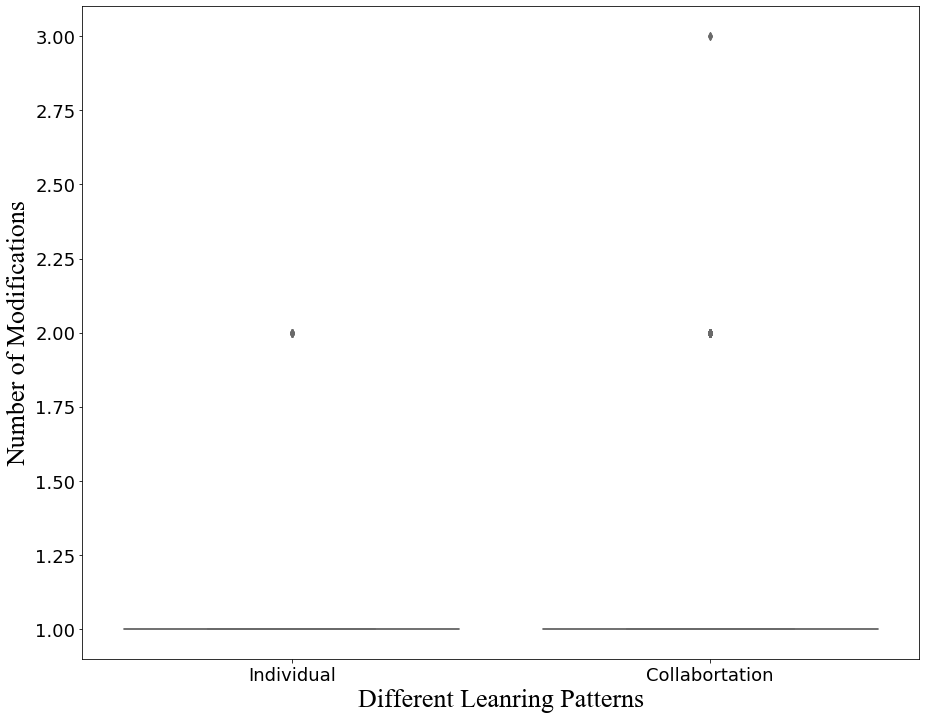

In [32]:
patterns=["Individual"]*len(ind_mod_num)+ ['Collabortation']*len(col_mod_num)
values=np.concatenate((ind_mod_num,col_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Mean Edit Distance of Modifications

In [33]:
stats.ttest_ind(ind_mod_ed_mean,col_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=-1.4088580153038526, pvalue=0.15896619093644737)

In [34]:
stats.f_oneway(ind_mod_ed_mean, col_mod_ed_mean)

F_onewayResult(statistic=1.1494725544834294, pvalue=0.2837065108542358)

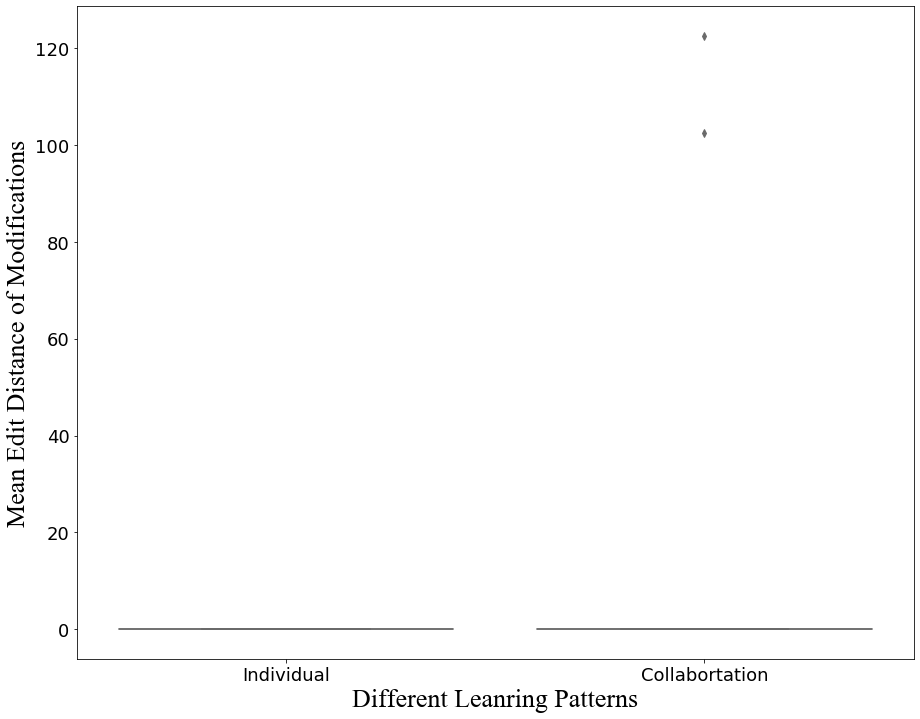

In [35]:
patterns=["Individual"]*len(ind_mod_ed_mean)+ ['Collabortation']*len(col_mod_ed_mean)
values=np.concatenate((ind_mod_ed_mean,col_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Sum Edit Distance of Modifications

In [36]:
stats.ttest_ind(ind_mod_ed_sum,col_mod_ed_sum,equal_var = False)

Ttest_indResult(statistic=-1.4088580153038526, pvalue=0.15896619093644737)

In [37]:
stats.f_oneway(ind_mod_ed_sum, col_mod_ed_sum)

F_onewayResult(statistic=1.1494725544834294, pvalue=0.2837065108542358)

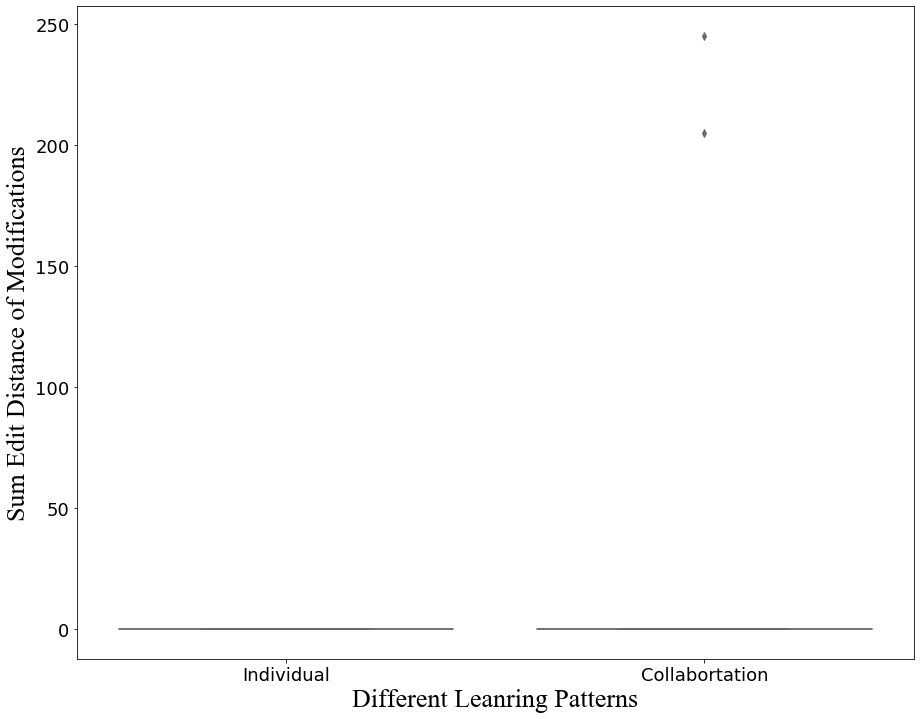

In [38]:
patterns=["Individual"]*len(ind_mod_ed_sum)+ ['Collabortation']*len(col_mod_ed_sum)
values=np.concatenate((ind_mod_ed_sum,col_mod_ed_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Sum Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Sum Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Sum Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [39]:
teach_data=pd.read_csv('prepostReducedPartial.csv')
teach_data.head()

,Student_ID,Time,Type,Test,Class,Teacher,SchoolDistrict,AssignedCondition,ActualCondition,Dyad,...,ErrorsLCDErroneous,ErrorsLCDProcedural,ErrorsErroneous,ErrorsProcedural,ErrorsTotal,WrittenLength,StudentDuration,ClassDuration,TotalPercentStudentDuration,TotalPercentClassDuration
0,Stu_005a9729f8e3869ff12b105e0f7bb82e,Pretest,A,Pretest A,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,104.0,32,36,0.006944,NaN
1,Stu_005a9729f8e3869ff12b105e0f7bb82e,Posttest,B,Posttest B,Deley,Deley,Montour,M,M,430.0,...,42,13,122,28,150,26.0,26,61,0.029440,NaN
2,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Pretest,B,Pretest B,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,135.0,32,48,0.003472,NaN
3,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Posttest,A,Posttest A,Shields,Shields,Lebanon,I,I,NaN,...,45,14,91,133,224,78.0,27,43,0.019204,NaN
4,Stu_03c1e9a4dde8c645a7554f75a1f33ea7,Pretest,A,Pretest A,Marchiona 1,Marchiona,Hopewell,M,M,431.0,...,13,5,60,19,79,201.0,38,1152,0.003899,NaN


In [40]:
teach_data.Teacher.value_counts()

Marchiona      122
Rongaus         78
Huffman         40
Ewonce          38
Giovannitti     36
Rinier          36
Pucka           34
Genes           34
Rindels         34
Deley           32
Brallier        32
Pilyih          26
Shaffer         26
Herrington      24
Shields         22
Name: Teacher, dtype: int64

In [41]:
teach_data_reduced=teach_data[teach_data.Time=='Pretest'][['Student_ID','Teacher','Gender']]
data=data.rename(index=str, columns={"Anon Student Id": "Student_ID"})
new_data=pd.merge(data, teach_data_reduced, on='Student_ID')

In [42]:
new_data

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),pattern,Teacher,Gender
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,test,Deley,Male
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,test,Deley,Male
2,723,All Data,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,America/New_York,15.75,ATTEMPT,Student2,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,collaborative,Deley,Male
3,758,All Data,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,America/New_York,0.333,ATTEMPT,NaN,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,collaborative,Deley,Male
4,801,All Data,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,America/New_York,11,ATTEMPT,Student2,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,collaborative,Deley,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,1027088,All Data,302d7089f553ab29edf2ee73017782a6,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 8:57,America/New_York,7.5,ATTEMPT,Student2,...,"1,1,0,0,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 12:57:01.317 UTC,2016-05-05 12:57:01.410 UTC,collaborative,Rongaus,Male
5712,1027197,All Data,17aeb9854ed2bd9ca3608ea5af163cf3,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:02,America/New_York,6.5,ATTEMPT,Student2,...,"1,1,1,0,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:02:49.120 UTC,2016-05-05 13:02:49.123 UTC,collaborative,Rongaus,Male
5713,1027258,All Data,fbe5e24bd131fa7faf3323484eebc43e,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S3024508d38c730641c5f0dbb7d816e0a,5/5/16 9:04,America/New_York,4.75,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0",QURpdG9ybyxSQ2Vzc25h,1 of 2,"S3024508d38c730641c5f0dbb7d816e0a,Sfa14ba6485e...",32.0,2016-05-05 13:04:34.486 UTC,2016-05-05 13:04:34.573 UTC,collaborative,Rongaus,Male
5714,1027831,All Data,e2286da6386c8c31efd53d2203ea4601,Stu_ff8ca883ce7d29e296f0ed8e55a3b31d,S85c20973b90e3b62f784ecd19838f7f4,5/6/16 10:22,America/New_York,0,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-06 14:22:10.521 UTC,2016-05-06 14:22:10.735 UTC,test,Rongaus,Male


In [43]:
group_data=new_data.groupby(['Student_ID','Level (Assignment)','Problem Name'])

In [44]:
data_rows=[temp_row for temp_row in group_data]
len(data_rows)

5471

In [45]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]

patterns=[]
genders=[]
teachers=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



    

In [46]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )


In [47]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

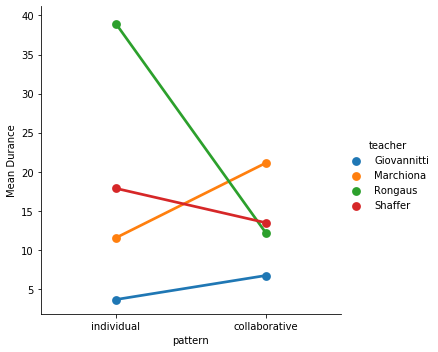

In [48]:
plot_learning_analysis('teacher','dur_mean','Mean Durance')

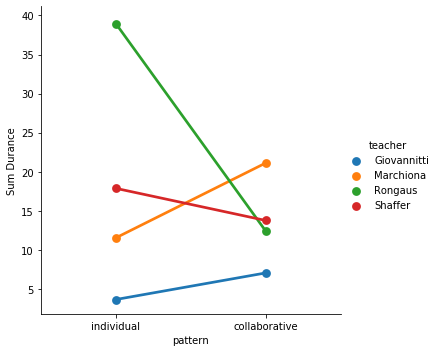

In [49]:
plot_learning_analysis('teacher','dur_sum','Sum Durance')

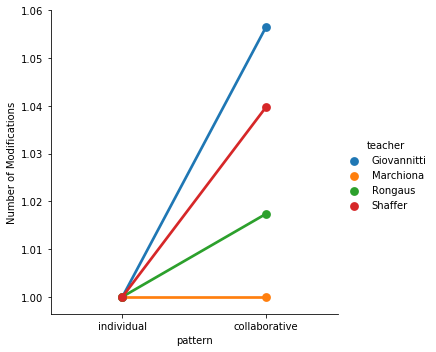

In [50]:
plot_learning_analysis('teacher','mod_num','Number of Modifications')

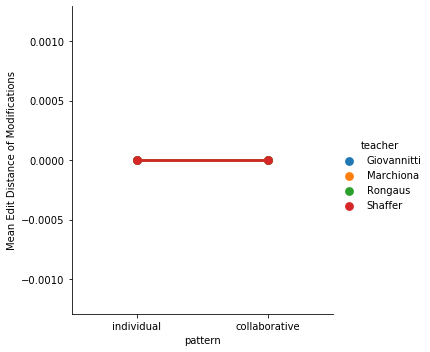

In [51]:
plot_learning_analysis('teacher','mod_ed_mean','Mean Edit Distance of Modifications')

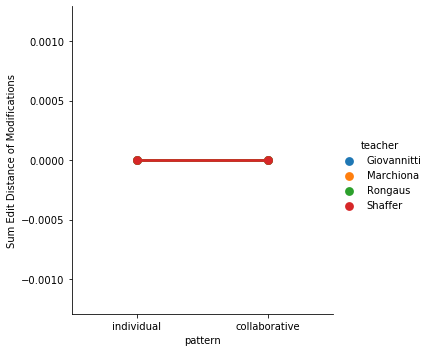

In [52]:
plot_learning_analysis('teacher','mod_ed_sum','Sum Edit Distance of Modifications')

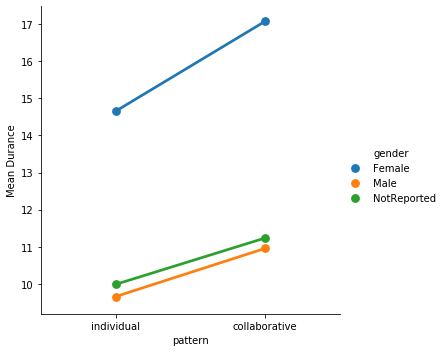

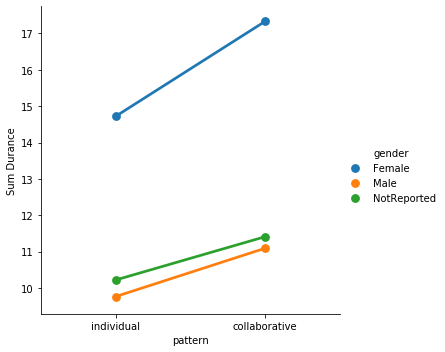

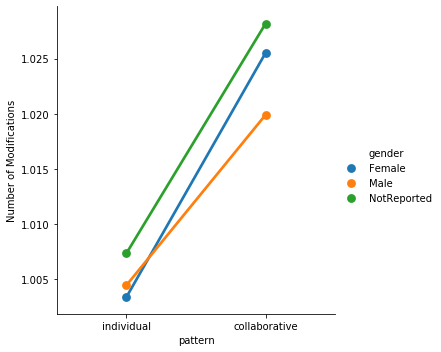

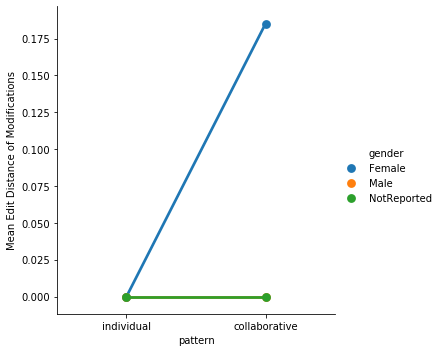

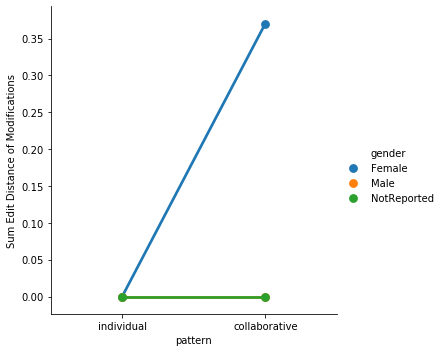

In [53]:
plot_learning_analysis('gender','dur_mean','Mean Durance')
plot_learning_analysis('gender','dur_sum','Sum Durance')
plot_learning_analysis('gender','mod_num','Number of Modifications')
plot_learning_analysis('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis('gender','mod_ed_sum','Sum Edit Distance of Modifications')

# Related to Grade

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
data_1=pd.read_csv('textResponses.csv')
data_2=pd.read_csv('prepostReducedPartial.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade"})
data_2=data_2[['Student_ID','Teacher','Gender','grade']]
data=pd.merge(data_1, data_2, on='Student_ID')
data.head()

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),Teacher,Gender,grade
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,0.222222
1,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,0.765432
2,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,0.222222
3,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,0.765432
4,723,All Data,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,America/New_York,15.75,ATTEMPT,Student2,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,Deley,Male,0.222222


In [46]:
data['pattern']=''
data['test_type']='learning exercise'
data['grade']=data['grade']*100
for i in range(len(data)):
    try:
        data['Duration (sec)'][i]=float(data['Duration (sec)'][i])
    except:
        data['Duration (sec)'][i]=0.0
    if data['Level (Assignment)'][i][-1]=='n':
        data['pattern'][i]='collaborative'
    elif data['Level (Assignment)'][i][-1]=='l':
        data['pattern'][i]='individual'
    else:
        data['pattern'][i]='test'
    if "know" in data['Level (Assignment)'][i]:
        data['test_type'][i]='pre-test'
    elif 'learned' in data['Level (Assignment)'][i]:
        data['test_type'][i]='post-test'

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:10: SettingWithCo

In [24]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','pattern','Input','Problem Name','grade','test_type']]

In [25]:
data_rows=[temp_row for temp_row in group_data]

In [27]:
data_rows[0][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),Teacher,Gender,grade,pattern,test_type
30,1888,All Data,0083a9e9eeaf4d6058fcaa8e9de110ba,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:18,America/New_York,0.333,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:18:21.876 UTC,2016-05-06 16:18:21.889 UTC,Deley,Male,22.222222,collaborative,
31,1888,All Data,0083a9e9eeaf4d6058fcaa8e9de110ba,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:18,America/New_York,0.333,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:18:21.876 UTC,2016-05-06 16:18:21.889 UTC,Deley,Male,76.543210,collaborative,
32,1939,All Data,93f48c6081ed8cf19ce63188665a9002,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:21,America/New_York,16.5,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:21:52.266 UTC,2016-05-06 16:21:52.280 UTC,Deley,Male,22.222222,collaborative,
33,1939,All Data,93f48c6081ed8cf19ce63188665a9002,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:21,America/New_York,16.5,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:21:52.266 UTC,2016-05-06 16:21:52.280 UTC,Deley,Male,76.543210,collaborative,
34,2324,All Data,8db721093a9a91a887500bb1755ebe5a,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:34,America/New_York,23.5,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:34:33.998 UTC,2016-05-06 16:34:34.15 UTC,Deley,Male,22.222222,collaborative,
35,2324,All Data,8db721093a9a91a887500bb1755ebe5a,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:34,America/New_York,23.5,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:34:33.998 UTC,2016-05-06 16:34:34.15 UTC,Deley,Male,76.543210,collaborative,
36,2366,All Data,46de9a15052509494e05f804732734fd,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:37,America/New_York,23.25,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:37:37.906 UTC,2016-05-06 16:37:37.924 UTC,Deley,Male,22.222222,collaborative,
37,2366,All Data,46de9a15052509494e05f804732734fd,Stu_005a9729f8e3869ff12b105e0f7bb82e,S75be45c3d3a68a8554fc9ef685262d12,5/6/16 12:37,America/New_York,23.25,ATTEMPT,Student1,...,1 of 2,"Sc3d828406b96c61a4c591119a80e086e,S75be45c3d3a...",32.0,2016-05-06 16:37:37.906 UTC,2016-05-06 16:37:37.924 UTC,Deley,Male,76.543210,collaborative,


In [28]:
from nltk.metrics import edit_distance
ind_grade=[]

col_grade=[]

for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative':
        temp_mean_grade=np.mean(temp_row[1]['grade'])
        col_grade.append(temp_mean_grade)
           
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_mean_grade=np.mean(temp_row[1]['grade'])
        ind_grade.append(temp_mean_grade)
    
    

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 26,
}

### pattern and grade

In [31]:
stats.ttest_ind(ind_grade,col_grade,equal_var = False)

Ttest_indResult(statistic=0.8517945271317293, pvalue=0.3947929003234706)

In [34]:
#from statsmodels.stats.anova import anova_lm
stats.f_oneway(ind_grade, col_grade)

F_onewayResult(statistic=0.7420147603674617, pvalue=0.3892600307443458)

In [ ]:
from statsmodels.stats.anova import anova_lm
anova_reA= anova_lm(ols('noise_A~C(group)',data=df2[['group','noise_A']]).fit())

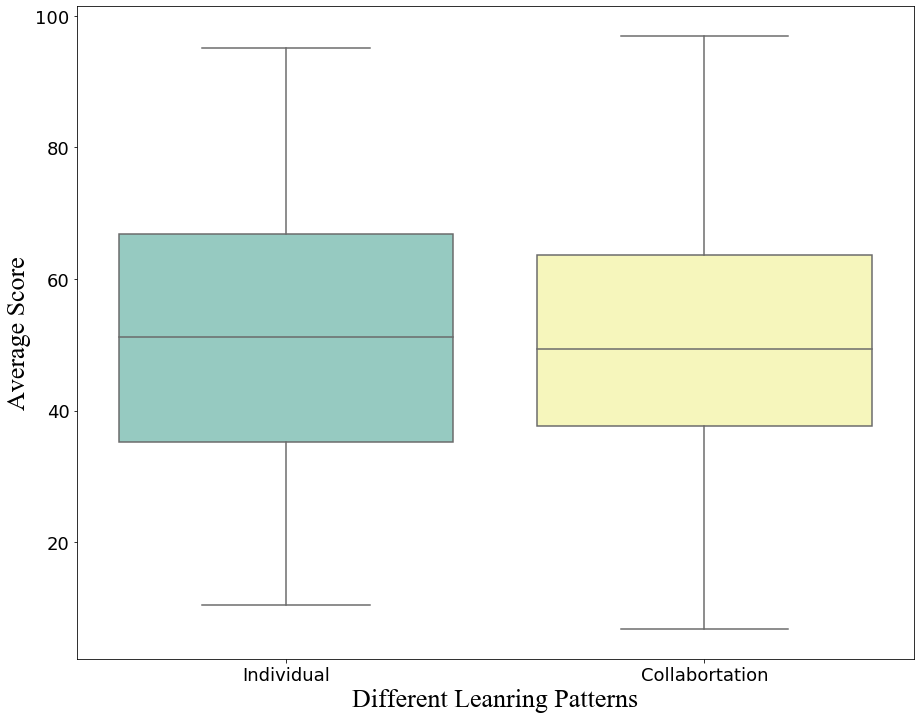

In [32]:
patterns=["Individual"]*len(ind_grade)+ ['Collabortation']*len(col_grade)
values=np.concatenate((ind_grade,col_grade))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Leanring Patterns":patterns,
    "Average Score":values
})

ax = sns.boxplot(x="Different Leanring Patterns", y="Average Score", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Leanring Patterns',font2)
axes.set_ylabel('Average Score',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

In [107]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]


for temp_row in data_rows:
    if temp_row[1].pattern.iloc[0]=='collaborative' or temp_row[1].pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        
        temp_grade=np.mean(temp_row[1]['grade'])
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



    

In [108]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum),'grade':np.array(grades),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders)} )


In [109]:
def plot_learning_analysis(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.pattern=='collaborative']
    temp_ind_df = ana_df[ana_df.pattern=='individual']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'collaborative':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'individual':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

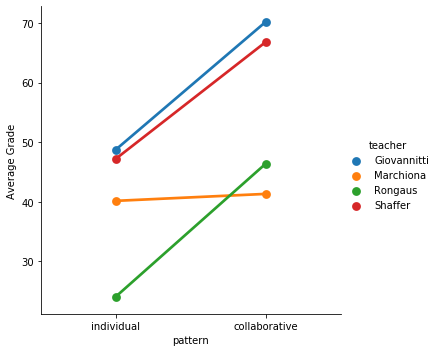

In [110]:
plot_learning_analysis('teacher','grade','Average Grade')

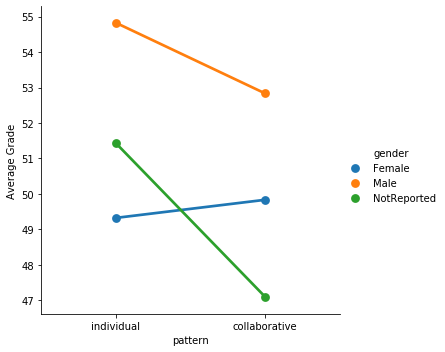

In [111]:
plot_learning_analysis('gender','grade','Average Grade')

# Comparison of pretest and posttest

In [64]:
from nltk.metrics import edit_distance
pre_duration_mean=[]
pre_duration_sum=[]
pre_mod_num=[]
pre_mod_ed_mean=[]
pre_mod_ed_sum=[]
pre_grade=[]

post_duration_mean=[]
post_duration_sum=[]
post_mod_num=[]
post_mod_ed_mean=[]
post_mod_ed_sum=[]
post_grade=[]

for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        pre_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        pre_duration_mean.append(temp_durance_mean)
        pre_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        pre_mod_num.append(temp_mod_num)
        pre_mod_ed_mean.append(temp_mod_mean)
        pre_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].pattern.iloc[0]=='individual':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        post_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        post_duration_mean.append(temp_durance_mean)
        post_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        post_mod_num.append(temp_mod_num)
        post_mod_ed_mean.append(temp_mod_mean)
        post_mod_ed_sum.append(temp_mod_sum)
    
    

In [72]:
data_rows[3][0]

('Stu_005a9729f8e3869ff12b105e0f7bb82e', 'Show what you know A')

In [73]:
data_rows[3][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),Teacher,Gender,grade,pattern,test_type
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,22.222222,test,pre-test
1,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,76.543210,test,pre-test
2,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,22.222222,test,pre-test
3,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,76.543210,test,pre-test


### Mean Duration

In [38]:
stats.ttest_ind(pre_duration_mean,post_duration_mean,equal_var = False)

Ttest_indResult(statistic=23.02450720121217, pvalue=1.1228218859448148e-70)

In [39]:
stats.f_oneway(pre_duration_mean, post_duration_mean)

F_onewayResult(statistic=480.01735096199394, pvalue=9.450705587643559e-76)

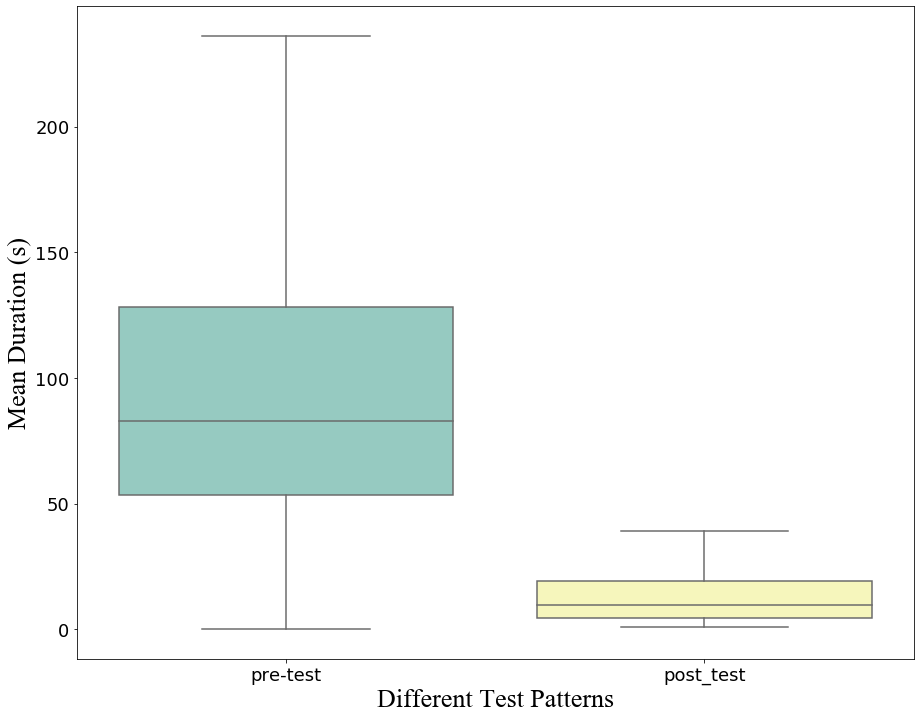

In [41]:
patterns=["pre-test"]*len(pre_duration_mean)+ ['post_test']*len(post_duration_mean)
values=np.concatenate((pre_duration_mean,post_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### Number of Modifications

In [47]:
stats.ttest_ind(pre_mod_ed_mean,post_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=6.966390748972802, pvalue=1.0110273759895676e-11)

In [48]:
stats.f_oneway(pre_mod_ed_mean, post_mod_ed_mean)

F_onewayResult(statistic=47.121555064241775, pvalue=1.91771283379142e-11)

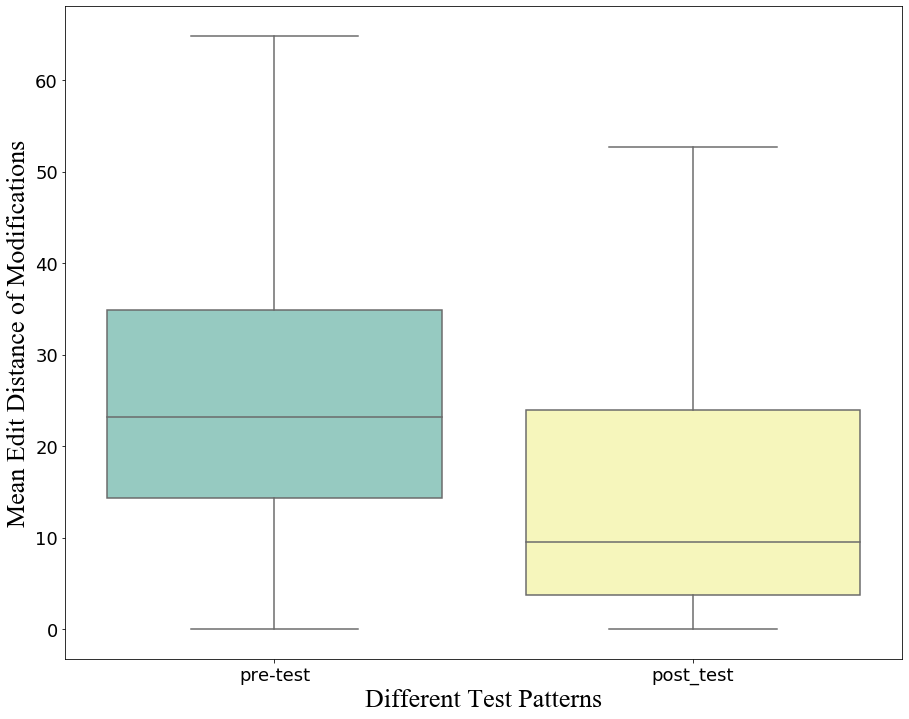

In [49]:
patterns=["pre-test"]*len(pre_mod_ed_mean)+ ['post_test']*len(post_mod_ed_mean)
values=np.concatenate((pre_mod_ed_mean,post_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### grade

In [65]:
stats.ttest_ind(pre_grade,post_grade,equal_var = False)

Ttest_indResult(statistic=1.1475329631200664, pvalue=0.25170133063913375)

In [66]:
stats.f_oneway(pre_grade, post_grade)

F_onewayResult(statistic=1.3186702609405436, pvalue=0.25136187548358585)

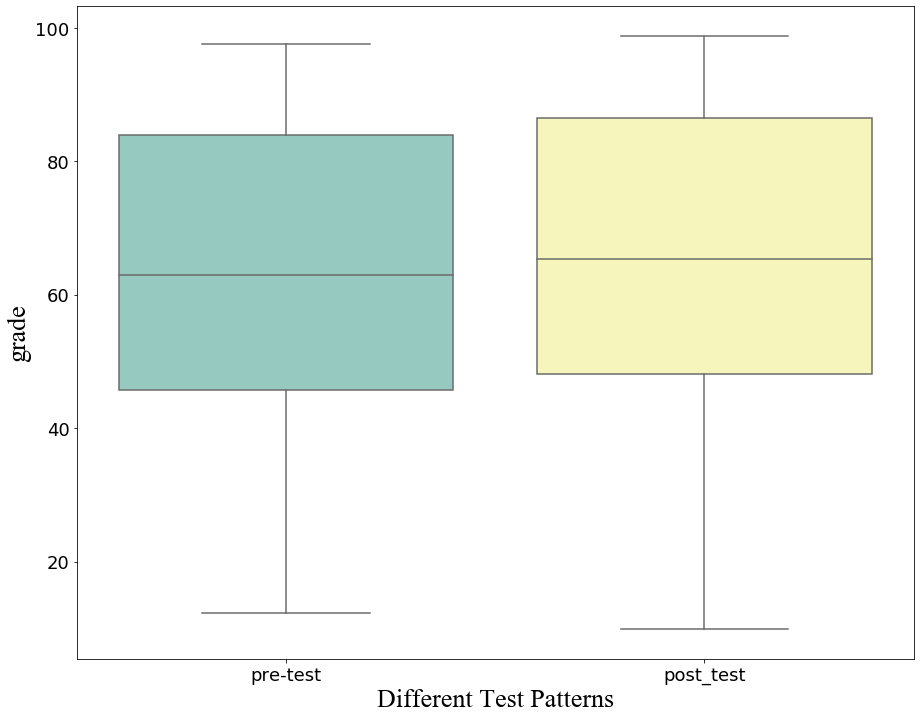

In [69]:
patterns=["pre-test"]*len(post_grade)+ ['post_test']*len(pre_grade)
values=np.concatenate((post_grade,pre_grade))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "grade":values
})

ax = sns.boxplot(x="Different Test Patterns", y="grade", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('grade',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect for test type

In [91]:
data_rows[3][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),Teacher,Gender,grade,pattern,test_type
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,22.222222,test,pre-test
1,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,76.543210,test,pre-test
2,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,22.222222,test,pre-test
3,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,76.543210,test,pre-test


In [101]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]
tests=[]


for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test' or temp_row[1].test_type.iloc[0]=='post-test':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['grade'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [102]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'grade':np.array(grades),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests) })


In [103]:
def plot_learning_analysis_test(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.test=='pre-test']
    temp_ind_df = ana_df[ana_df.test=='post-test']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'pre-test':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'post-test':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

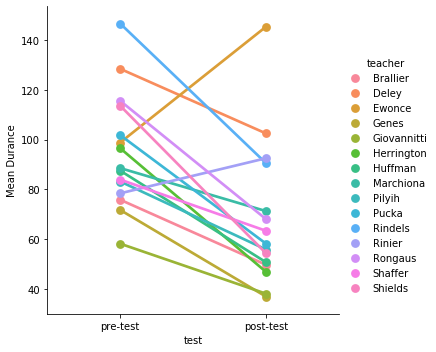

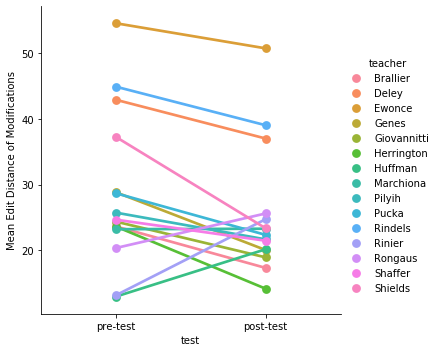

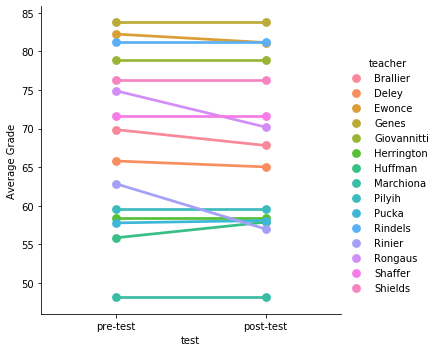

In [104]:
plot_learning_analysis_test('teacher','dur_mean','Mean Durance')
plot_learning_analysis_test('teacher','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('teacher','grade','Average Grade')

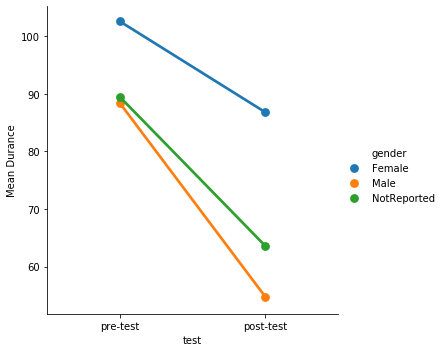

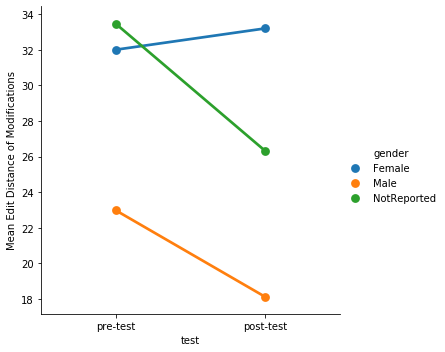

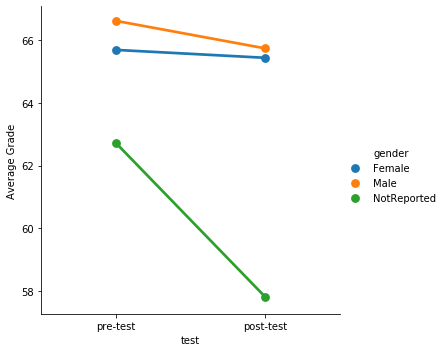

In [105]:
plot_learning_analysis_test('gender','dur_mean','Mean Durance')
plot_learning_analysis_test('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('gender','grade','Average Grade')

In [338]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade"})
data_2['grade']=data_2['grade']*100
data_2=data_2[['Student_ID','Teacher','Gender','grade','test_type']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\ntds\li

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111


In [339]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','Input','Problem Name','grade','test_type']]

In [340]:
data_rows=[temp_row for temp_row in group_data]
data_rows[0][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222


In [341]:
from nltk.metrics import edit_distance
pre_duration_mean=[]
pre_duration_sum=[]
pre_mod_num=[]
pre_mod_ed_mean=[]
pre_mod_ed_sum=[]
pre_grade=[]

post_duration_mean=[]
post_duration_sum=[]
post_mod_num=[]
post_mod_ed_mean=[]
post_mod_ed_sum=[]
post_grade=[]

for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        pre_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        pre_duration_mean.append(temp_durance_mean)
        pre_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        pre_mod_num.append(temp_mod_num)
        pre_mod_ed_mean.append(temp_mod_mean)
        pre_mod_ed_sum.append(temp_mod_sum)
                        
            
            
                                
    elif temp_row[1].test_type.iloc[0]=='post-test':
        temp_mean_grade=np.max(temp_row[1]['grade'])
        post_grade.append(temp_mean_grade)
        
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        post_duration_mean.append(temp_durance_mean)
        post_duration_sum.append(temp_durance_sum)
        
        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed) 
            except:
                a=0
            last_text=temp_text
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0
        
        post_mod_num.append(temp_mod_num)
        post_mod_ed_mean.append(temp_mod_mean)
        post_mod_ed_sum.append(temp_mod_sum)
    
    

### mean durance

In [326]:
stats.ttest_ind(pre_duration_mean,post_duration_mean,equal_var = False)

Ttest_indResult(statistic=5.711451579480084, pvalue=1.8277768251250667e-08)

In [327]:
stats.f_oneway(pre_duration_mean, post_duration_mean)

F_onewayResult(statistic=32.933858279525374, pvalue=1.5424494039716774e-08)

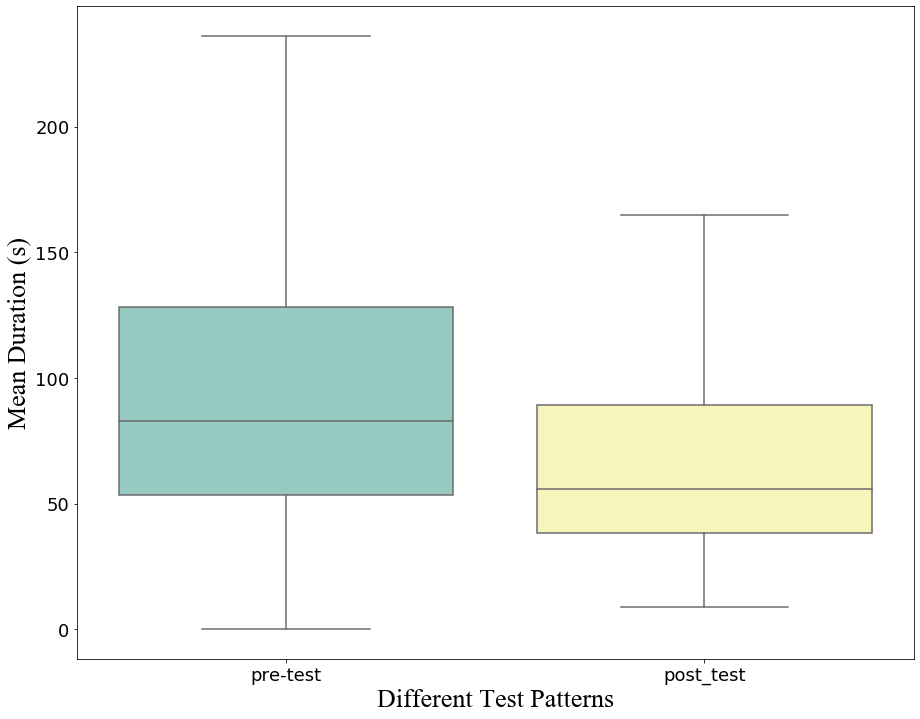

In [328]:
patterns=["pre-test"]*len(pre_duration_mean)+ ['post_test']*len(post_duration_mean)
values=np.concatenate((pre_duration_mean,post_duration_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Duration (s)":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Duration (s)", data=my_data,palette="Set3",showfliers = False)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Duration (s)',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### Number of modifications

In [343]:
stats.ttest_ind(pre_mod_num,post_mod_num,equal_var = False)

Ttest_indResult(statistic=0.48427780719317515, pvalue=0.628384279471031)

In [344]:
stats.f_oneway(pre_mod_num, post_mod_num)

F_onewayResult(statistic=0.23805311697286513, pvalue=0.6258014689689968)

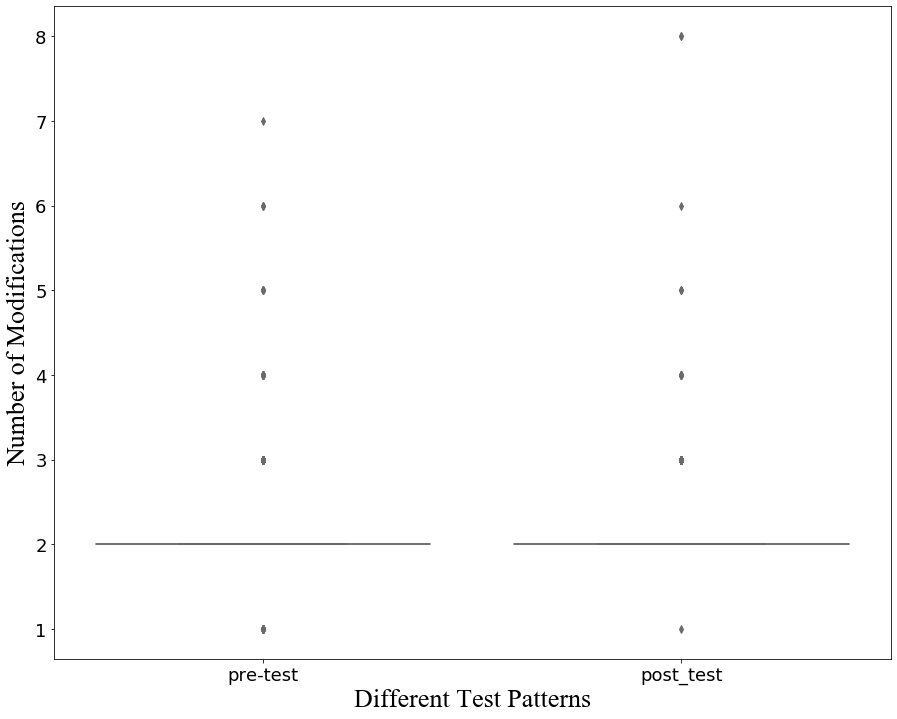

In [352]:
patterns=["pre-test"]*len(pre_mod_num)+ ['post_test']*len(post_mod_num)
values=np.concatenate((pre_mod_num,post_mod_num))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Number of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Number of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Number of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### mean edit distance

In [346]:
stats.ttest_ind(pre_mod_ed_mean,post_mod_ed_mean,equal_var = False)

Ttest_indResult(statistic=2.0064624715447366, pvalue=0.045374788610716796)

In [347]:
stats.f_oneway(pre_mod_ed_mean, post_mod_ed_mean)

F_onewayResult(statistic=4.174976428077037, pvalue=0.041479645222102325)

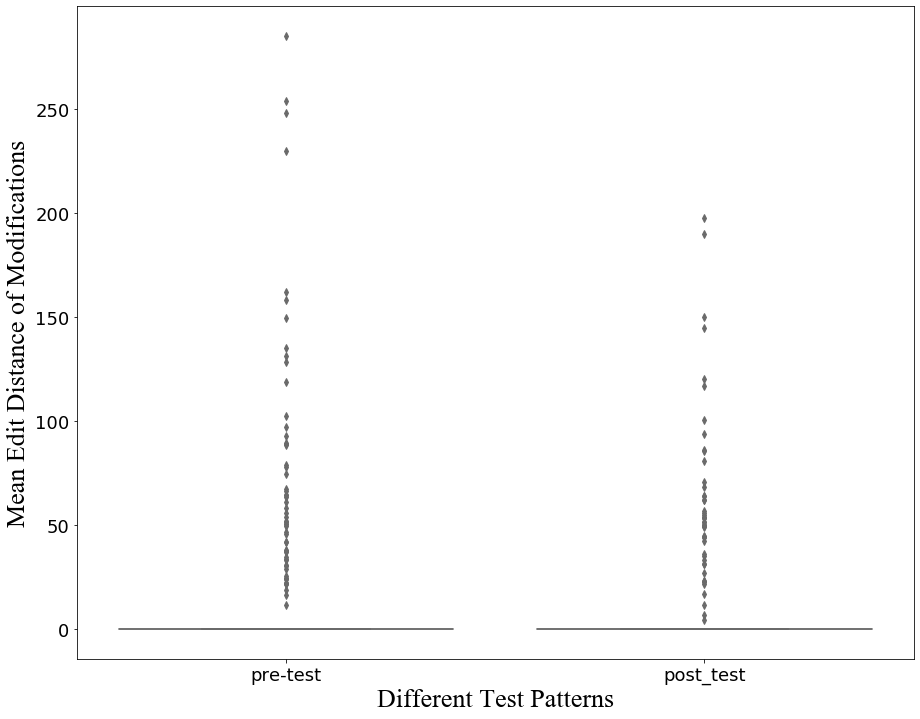

In [351]:
patterns=["pre-test"]*len(pre_mod_ed_mean)+ ['post_test']*len(post_mod_ed_mean)
values=np.concatenate((pre_mod_ed_mean,post_mod_ed_mean))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Mean Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Mean Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Mean Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

### sum edit distance

In [ ]:
stats.ttest_ind(pre_mod_ed_sum,post_mod_ed_sum,equal_var = False)

In [ ]:
stats.f_oneway(pre_mod_ed_sum, post_mod_ed_sum)

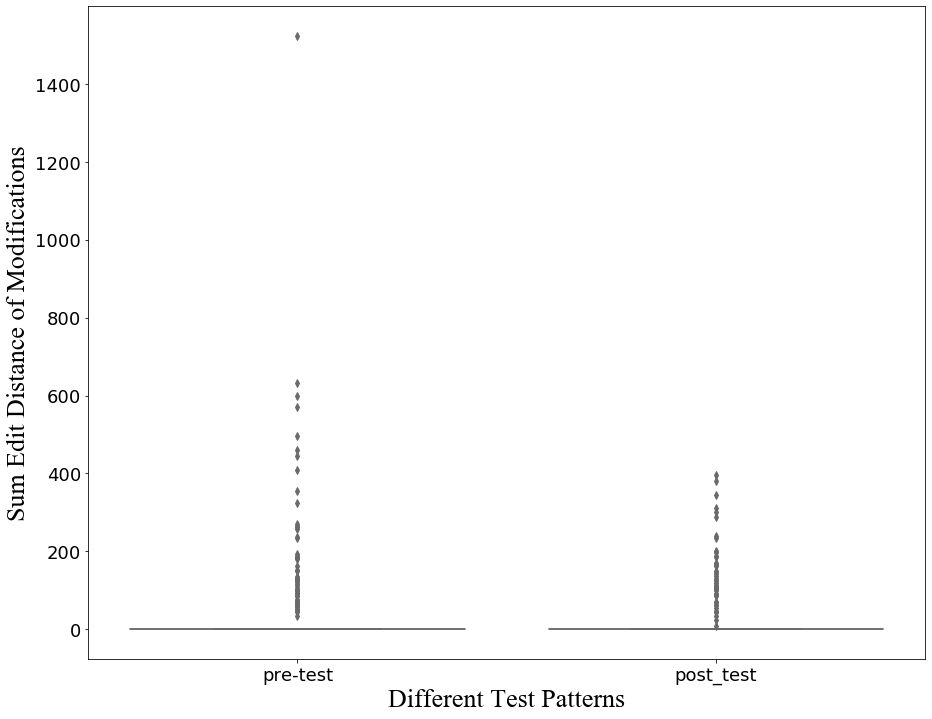

In [350]:
patterns=["pre-test"]*len(pre_mod_ed_sum)+ ['post_test']*len(post_mod_ed_sum)
values=np.concatenate((pre_mod_ed_sum,post_mod_ed_sum))
fig,axes = plt.subplots(1,1,figsize=(15,12))
my_data = pd.DataFrame({
    "Different Test Patterns":patterns,
    "Sum Edit Distance of Modifications":values
})

ax = sns.boxplot(x="Different Test Patterns", y="Sum Edit Distance of Modifications", data=my_data,palette="Set3",showfliers = True)
#plt.ylim(-25,0)
plt.tick_params(labelsize=18)
axes.set_xlabel('Different Test Patterns',font2)
axes.set_ylabel('Sum Edit Distance of Modifications',font2)
labels = axes.get_xticklabels() + axes.get_yticklabels()
#[label.set_fontname('Times New Roman') for label in labels]

# Interaction effect of test type

In [330]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]
tests=[]


for temp_row in data_rows:
    if temp_row[1].test_type.iloc[0]=='pre-test' or temp_row[1].test_type.iloc[0]=='post-test':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['grade'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [331]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'grade':np.array(grades),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests) })


In [332]:
def plot_learning_analysis_test(feature_1, feature_2, label_y):
    temp_col_df = ana_df[ana_df.test=='pre-test']
    temp_ind_df = ana_df[ana_df.test=='post-test']
    temp_col_df= temp_col_df.groupby(feature_1)[[feature_2]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({feature_1:temp_col_df.index,'pre-test':np.array(temp_col_df[feature_2])})
    temp_ind_df= temp_ind_df.groupby(feature_1)[[feature_2]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({feature_1:temp_ind_df.index,'post-test':np.array(temp_ind_df[feature_2])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df[feature_1]
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue=feature_1,kind="point", data=temp_df)
    plt.show()
    

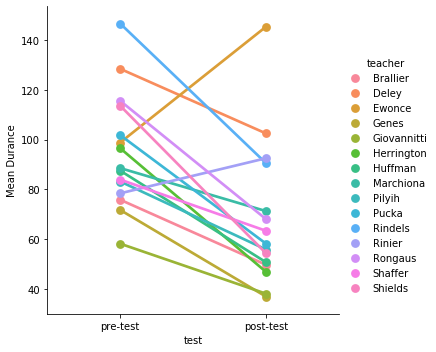

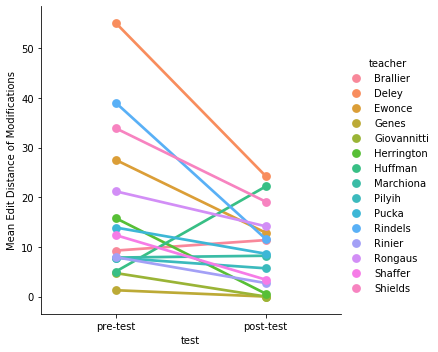

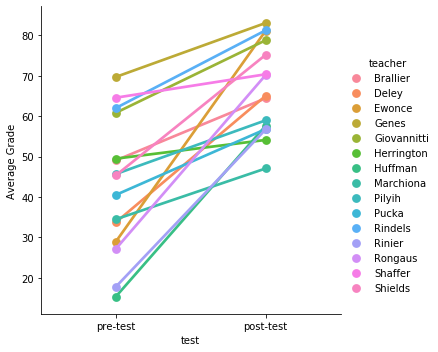

In [333]:
plot_learning_analysis_test('teacher','dur_mean','Mean Durance')
plot_learning_analysis_test('teacher','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('teacher','grade','Average Grade')

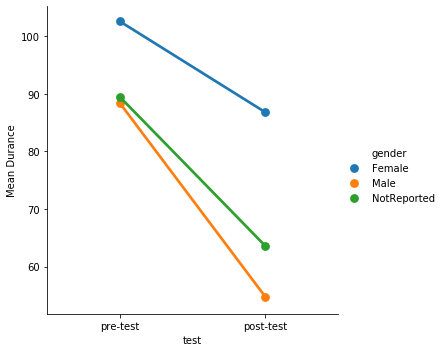

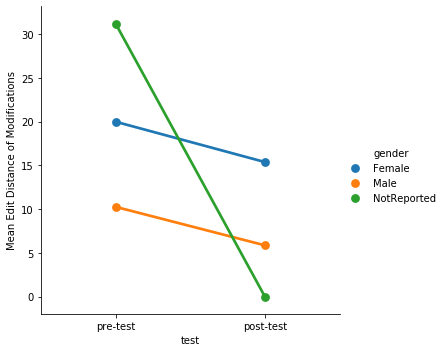

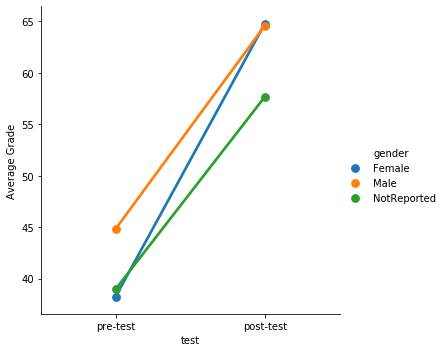

In [334]:
plot_learning_analysis_test('gender','dur_mean','Mean Durance')
plot_learning_analysis_test('gender','mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test('gender','grade','Average Grade')

# Interaction effect of test type and learning pattern

In [271]:
data_1=pd.read_csv('textResponses.csv')
data_1=data_1.rename(index=str, columns={"Anon Student Id": "Student_ID"})
data_1['test_type']='learning exercise'

for i in range(len(data_1)):
    try:
        data_1['Duration (sec)'][i]=float(data_1['Duration (sec)'][i])
    except:
        data_1['Duration (sec)'][i]=0.0
    if "know" in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='pre-test'
    elif 'learned' in data_1['Level (Assignment)'][i]:
        data_1['test_type'][i]='post-test'


data_2=pd.read_csv('prepostReducedPartial.csv')
data_2['test_type']='learning exercise'

for i in range(len(data_2)):
    if "Pretest" in data_2['Test'][i]:
        data_2['test_type'][i]='pre-test'
    elif 'Posttest' in data_2['Test'][i]:
        data_2['test_type'][i]='post-test'


data_2=data_2.rename(index=str, columns={"TotalPercentage": "grade"})
data_2['grade']=data_2['grade']*100
data_2=data_2[['Student_ID','Teacher','Gender','grade','test_type']]
data=pd.merge(data_1, data_2, on=['Student_ID','test_type'])
data.head()

D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda\envs\ntds\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda\envs\ntds\li

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111


In [272]:
students=data_1.Student_ID.value_counts().index
patterns=[]
for temp_stduent in students:
    temp_levels=data_1[data_1.Student_ID==temp_stduent]['Level (Assignment)'].value_counts().index
    temp_pattern='NotReported'
    for temp_level in temp_levels:
        if 'Collaboration' in temp_level :
            temp_pattern='collaborative'
            break
        if 'Individual' in temp_level:
            temp_pattern='individual'
            break
    patterns.append(temp_pattern)

In [273]:
patterns[:10]

['collaborative',
 'individual',
 'collaborative',
 'individual',
 'individual',
 'individual',
 'collaborative',
 'individual',
 'collaborative',
 'individual']

In [274]:
len(students)

426

In [275]:
len(patterns)

426

In [276]:
student_pattern= pd.DataFrame({
    "Student_ID":students,
    "overall_pattern":patterns
})

In [277]:
student_pattern

,Student_ID,overall_pattern
0,Stu_b2fe63b2cee5a3074da50bd17bb7e0ce,collaborative
1,Stu_0ef867b98e880e80e360e8d5f56cf095,individual
2,Stu_075a11e1b4fbee4969b0b0146a2ffec4,collaborative
3,Stu_e2e9d5bdc30bf6061f08df38182c5574,individual
4,Stu_bc9ca7dddebb11b58ea4e12c960e893e,individual
...,...,...
421,Stu_07c54f646f820f5200ee23d1ebb9b3b1,individual
422,Stu_f80727c80dc0890aa7900900540c767d,NotReported
423,Stu_37d3b58fd56155786d9eac47bc796a0c,NotReported
424,Stu_700ecf016a30e9b3357883081895df9d,NotReported


In [278]:
new_data=pd.merge(data,student_pattern,on='Student_ID')
data=new_data
data.head()

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,overall_pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,pre-test,Deley,Male,22.222222,collaborative
1,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,pre-test,Deley,Male,22.222222,collaborative
2,3315,All Data,630a500c45ba54bd7ee5f66857df6539,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:26,America/New_York,81.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:26:58.846 UTC,2016-05-09 16:26:58.896 UTC,post-test,Deley,Male,76.543210,collaborative
3,3317,All Data,9aed6b18d9bd5b6371d871736821c853,Stu_005a9729f8e3869ff12b105e0f7bb82e,S97c6ad0a34e051715542a93cb0af09e4,5/9/16 12:29,America/New_York,60.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-09 16:29:02.449 UTC,2016-05-09 16:29:02.504 UTC,post-test,Deley,Male,76.543210,collaborative
4,3983,All Data,5605ac32fa79cc8760df9c91f047dba4,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,S8149b22ef12e3677674b1030a1e98fb0,5/16/16 9:42,America/New_York,151,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-16 13:42:30.808 UTC,2016-05-16 13:42:30.850 UTC,pre-test,Shields,Male,11.111111,individual


In [279]:
group_data=data.groupby(['Student_ID','Level (Assignment)'])[['Duration (sec)','overall_pattern','Input','Problem Name','grade','test_type']]

In [280]:
data_rows=[temp_row for temp_row in group_data]

In [281]:
data_rows[3][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),test_type,Teacher,Gender,grade,overall_pattern
6,7099,All Data,67cf78707ccc26e1e9637cdf9cf56a38,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:17,America/New_York,50,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-20 13:17:59.942 UTC,2016-05-20 13:17:59.979 UTC,post-test,Shields,Male,51.851852,individual
7,7101,All Data,9524b2106c4398c0f080bd48595e766c,Stu_03af0deb60a1b42c70c4d71b3f9f8bed,Sd5e01db04cd96519388d7dbf89754206,5/20/16 9:20,America/New_York,63,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-20 13:20:09.641 UTC,2016-05-20 13:20:09.699 UTC,post-test,Shields,Male,51.851852,individual


In [282]:
duration_mean=[]
duration_sum=[]
mod_num=[]
mod_ed_mean=[]
mod_ed_sum=[]
grades=[]

patterns=[]
genders=[]
teachers=[]
tests=[]


for temp_row in data_rows:
    if temp_row[1].overall_pattern.iloc[0]=='collaborative' or temp_row[1].overall_pattern.iloc[0]=='individual':
        temp_durance_mean=np.mean(temp_row[1]['Duration (sec)'])
        temp_durance_sum=np.sum(temp_row[1]['Duration (sec)'])
        temp_grade=np.max(temp_row[1]['grade'])
        duration_mean.append(temp_durance_mean)
        duration_sum.append(temp_durance_sum)
        grades.append(temp_grade)

        temp_gender=temp_row[1].Gender.iloc[0]
        temp_pattern=temp_row[1].overall_pattern.iloc[0]
        temp_teacher=temp_row[1].Teacher.iloc[0]
        temp_test=temp_row[1].test_type.iloc[0]
        patterns.append(temp_pattern)
        genders.append(temp_gender)
        teachers.append(temp_teacher)
        tests.append(temp_test)


        temp_mod_num=len(temp_row[1].Input)
        temp_mod_ed_list=[]
        for temp_text in temp_row[1].Input:
            try:
                temp_ed=edit_distance(temp_text,last_text)
                temp_mod_ed_list.append(temp_ed)
            except:
                a=0
            last_text=temp_text           
        try:
            del last_text
        except:
            a=0
        temp_mod_ed_list=np.array(temp_mod_ed_list)
        if len(temp_mod_ed_list)>1:
            temp_mod_mean=np.mean(temp_mod_ed_list)
            temp_mod_sum=np.sum(temp_mod_ed_list)
        else:
            temp_mod_mean=0
            temp_mod_sum=0

        mod_num.append(temp_mod_num)
        mod_ed_mean.append(temp_mod_mean)
        mod_ed_sum.append(temp_mod_sum)



In [283]:
ana_df=pd.DataFrame({'dur_mean':np.array(duration_mean),'dur_sum':np.array(duration_sum), 'grade':np.array(grades),
                   'mod_num':np.array(mod_num),'mod_ed_mean':np.array(mod_ed_mean),'mod_ed_sum':np.array(mod_ed_sum),
                  'pattern':np.array(patterns), 'teacher':np.array(teachers),'gender':np.array(genders),'test':np.array(tests) })


In [301]:
ana_df.head()

,dur_mean,dur_sum,grade,mod_num,mod_ed_mean,mod_ed_sum,pattern,teacher,gender,test
0,356.75,713.5,22.222222,2,0.0,0,collaborative,Deley,Male,pre-test
1,71.00,142.0,76.543210,2,0.0,0,collaborative,Deley,Male,post-test
2,175.50,351.0,11.111111,2,0.0,0,individual,Shields,Male,pre-test
3,56.50,113.0,51.851852,2,0.0,0,individual,Shields,Male,post-test
4,172.50,345.0,14.814815,2,0.0,0,collaborative,Marchiona,Female,pre-test


In [303]:
def plot_learning_analysis_test_pattern( feature, label_y):
    temp_col_df = ana_df[ana_df['test']=='pre-test']
    temp_ind_df = ana_df[ana_df['test']=='post-test']
    
    temp_col_df= temp_col_df.groupby('pattern')[[feature]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({'pattern':temp_col_df.index,'pre-test':np.array(temp_col_df[feature])})
    
    temp_ind_df= temp_ind_df.groupby('pattern')[[feature]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({'pattern':temp_ind_df.index,'post-test':np.array(temp_ind_df[feature])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df['pattern']
    temp_df = temp_df.loc[:,['pre-test','post-test']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"test","0":label_y},inplace=True)
    sns.catplot(x="test", y=label_y, hue='pattern',kind="point", data=temp_df)
    plt.show()

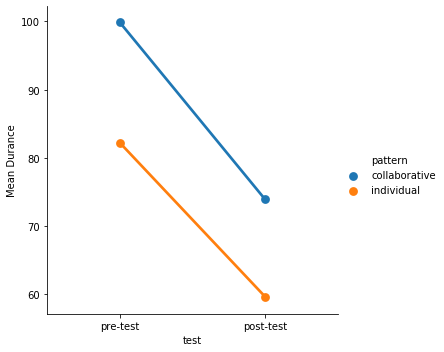

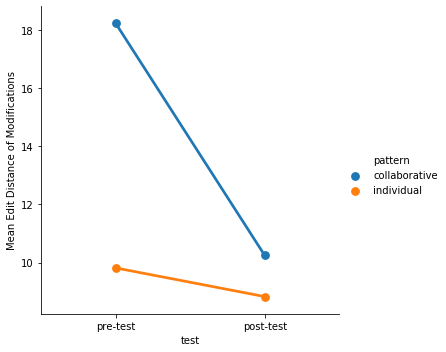

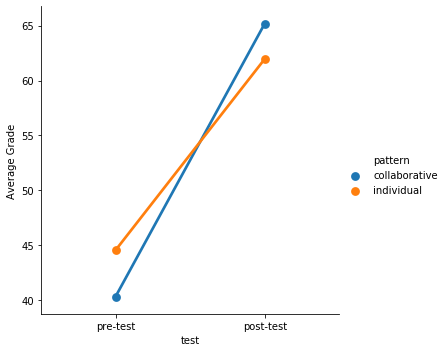

In [304]:
plot_learning_analysis_test_pattern('dur_mean','Mean Durance')
plot_learning_analysis_test_pattern('mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test_pattern('grade','Average Grade')

In [289]:
def plot_learning_analysis_test_pattern_1( feature, label_y):
    temp_col_df = ana_df[ana_df['pattern']=='collaborative']
    temp_ind_df = ana_df[ana_df['pattern']=='individual']
    temp_col_df= temp_col_df.groupby('test')[[feature]].mean()
    #temp_col_df=pd.DataFrame({'col_'+'dur_mod':np.array(temp_col_df['dur_mod'])})
    temp_col_df=pd.DataFrame({'test':temp_col_df.index,'collaborative':np.array(temp_col_df[feature])})
    temp_ind_df= temp_ind_df.groupby('test')[[feature]].mean()
    #temp_ind_df=pd.DataFrame({'ind_'+'dur_mod':np.array(temp_ind_df['dur_mod'])})
    temp_ind_df=pd.DataFrame({'test':temp_ind_df.index,'individual':np.array(temp_ind_df[feature])})
    temp_df=pd.merge(temp_ind_df,temp_col_df)
    temp_df.index=temp_df['test']
    temp_df = temp_df.loc[:,['individual','collaborative']]
    temp_df = temp_df.stack()
    temp_df = temp_df.to_frame()
    temp_df.reset_index(inplace=True)
    temp_df.columns = temp_df.columns.astype(str)
    temp_df.rename(columns={"level_1":"pattern","0":label_y},inplace=True)
    sns.catplot(x="pattern", y=label_y, hue='test',kind="point", data=temp_df)
    plt.show()

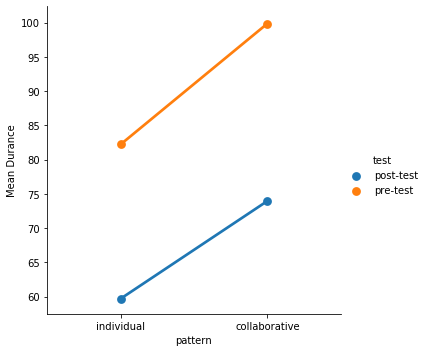

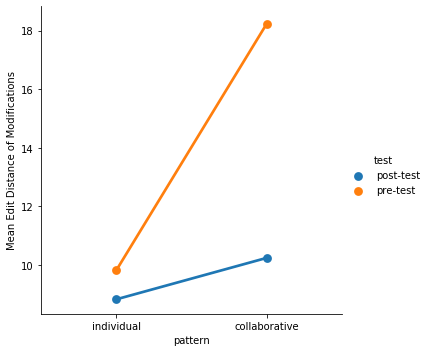

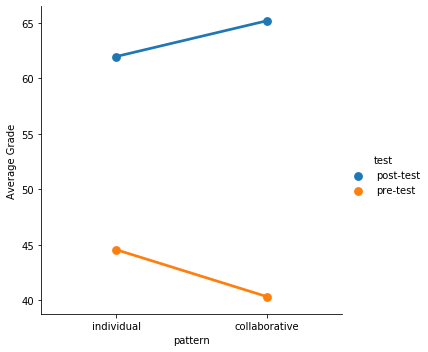

In [290]:
plot_learning_analysis_test_pattern_1('dur_mean','Mean Durance')
plot_learning_analysis_test_pattern_1('mod_ed_mean','Mean Edit Distance of Modifications')
plot_learning_analysis_test_pattern_1('grade','Average Grade')

In [198]:
data_rows[3][0]

('Stu_005a9729f8e3869ff12b105e0f7bb82e', 'Show what you know A')

In [199]:
data_rows[3][1]['Level (Assignment)']

0    Show what you know A
1    Show what you know A
2    Show what you know A
3    Show what you know A
Name: Level (Assignment), dtype: object

In [200]:
data_rows[3][1]['Problem Name']

0    5
1    5
2    6
3    6
Name: Problem Name, dtype: object

In [201]:
data_rows[3][1]

,Row,Sample Name,Transaction Id,Student_ID,Session Id,Time,Time Zone,Duration (sec),Student Response Type,Student Response Subtype,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),Teacher,Gender,grade,test_type,overall_pattern
0,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,22.222222,pre-test,collaborative
1,196,All Data,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,America/New_York,132.5,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,Deley,Male,76.543210,pre-test,collaborative
2,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,22.222222,pre-test,collaborative
3,197,All Data,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,America/New_York,581,ATTEMPT,NaN,...,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,Deley,Male,76.543210,pre-test,collaborative
